In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# split function for training and testing data
from sklearn.model_selection import train_test_split

# Import sequential layer generator && layer data
# Import Dense layer (all input on the current layer)
# Import Model 
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Diplay data lib
import matplotlib.pyplot as plt

# Image handler lib 
from PIL import Image

print(tf.__version__)
print(pd.__version__)

/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dty

1.14.0
1.0.4


In [2]:
images_folder_name = 'pokemon_so_deep/result/'

In [3]:
# Read CSV labels
labels = pd.read_csv('pokemon_so_deep/pokemon.csv', delimiter = ';')
labels

,name,type_1,type_2,sprite
0,Bulbasaur,Grass,Poison,001.png
1,Ivysaur,Grass,Poison,002.png
2,Venusaur,Grass,Poison,003.png
3,Charmander,Fire,NaN,004.png
4,Charmeleon,Fire,NaN,005.png
...,...,...,...,...
885,Drakloak,Dragon,Ghost,886.png
886,Dragapult,Dragon,Ghost,887.png
887,Zacian,Fairy,Steel,888.png
888,Zamazenta,Fighting,Steel,889.png


In [4]:
pokemon_types = labels[['type_1', 'type_2']]
pokemon_types

,type_1,type_2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Fire,NaN
4,Fire,NaN
...,...,...
885,Dragon,Ghost
886,Dragon,Ghost
887,Fairy,Steel
888,Fighting,Steel


In [5]:
# Create input data
list_of_images = []

for label_sprite in labels['sprite'] :
    file = Image.open(images_folder_name + label_sprite)

    # Virer alpha
    file = file.convert('RGB')
    data = np.array( file, dtype='uint8' )
    
    # Flatten
    data_reshape = data.reshape(-1)
    
    # Divide by pixel
    data_reshape_by_pixel = data_reshape / 255
    
    list_of_images.append(data_reshape_by_pixel)

list_of_images = np.array(list_of_images)

In [6]:
# input dico for all types (dataframe)
pokemon_types_number_dic = {
    'Bug' : 0,
    'Dark' : 1,
    'Dragon' : 2,
    'Electric' : 3,
    'Fairy' : 4,
    'Fighting' : 5,
    'Fire' : 6,
    'Flying' : 7,
    'Ghost' : 8,
    'Grass' : 9,
    'Ground' : 10,
    'Ice' : 11,
    'Normal' : 12,
    'Poison' : 13,
    'Psychic' : 14,
    'Rock' : 15,
    'Steel' : 16,
    'Water' : 17,
    18 : 18
}

pokemon_types.fillna(18, inplace = True)

pokemon_types['type_1'] = pokemon_types.type_1.apply(lambda x: pokemon_types_number_dic[x])
pokemon_types['type_2'] = pokemon_types.type_2.apply(lambda x: pokemon_types_number_dic[x])

pokemon_types

/home/ulphidius/.local/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,type_1,type_2
0,9,13
1,9,13
2,9,13
3,6,18
4,6,18
...,...,...
885,2,8
886,2,8
887,4,16
888,5,16


In [7]:
# Create output data
output_array = []
for index, pokemon_type in pokemon_types.iterrows() :
    type_array = np.zeros(19)
    type_array[pokemon_type['type_1']] = 1
    #type_array[pokemon_type['type_2']] = 1
    output_array.append(type_array)

output_array = np.array(output_array)

In [8]:
# Split data between test end train
X_train, X_test, y_train, y_test = train_test_split(list_of_images, output_array, test_size = 0.20, random_state=42)

In [9]:
# Not working
#model = Sequential()
#model.add(Input(shape=(32, 32, 3)))
#model.add(Dense(19, activation = 'softmax'))

input_format = Input(shape=list_of_images[0].shape)
invisible_layer_1 = Dense(15, activation = 'relu')(input_format)
invisible_layer_2 = Dense(7, activation = 'relu')(invisible_layer_1)
output_end = Dense(19, activation = 'softmax')(invisible_layer_2)
model = Model(inputs=input_format, outputs=output_end)

optimizer_custom = tf.keras.optimizers.RMSprop(
    learning_rate=0.0000001,
    name="custom_rms"
)

#tf.keras.optimizers.Adam(
#    learning_rate=0.001,
#    beta_1=0.9,
#    beta_2=0.999,
#    epsilon=1e-07,
#    amsgrad=False,
#    name="Adam",
#    **kwargs
#)


model.compile(optimizer = optimizer_custom, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 15)                46095     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                152       
Total params: 46,359
Trainable params: 46,359
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Epochs number of loop over the model
fit_history = model.fit(X_train, y_train, 
                        epochs = 600, 
                        verbose=1,
                        validation_data=(X_test, y_test))

Train on 712 samples, validate on 178 samples
Epoch 1/600
712/712 [==============================] - 0s 210us/sample - loss: 3.0749 - acc: 0.0421 - val_loss: 3.0549 - val_acc: 0.0281
Epoch 2/600
712/712 [==============================] - 0s 74us/sample - loss: 3.0730 - acc: 0.0421 - val_loss: 3.0536 - val_acc: 0.0281
Epoch 3/600
712/712 [==============================] - 0s 80us/sample - loss: 3.0713 - acc: 0.0421 - val_loss: 3.0523 - val_acc: 0.0225
Epoch 4/600
712/712 [==============================] - 0s 76us/sample - loss: 3.0697 - acc: 0.0421 - val_loss: 3.0511 - val_acc: 0.0225
Epoch 5/600
712/712 [==============================] - 0s 67us/sample - loss: 3.0681 - acc: 0.0421 - val_loss: 3.0498 - val_acc: 0.0225
Epoch 6/600
712/712 [==============================] - 0s 67us/sample - loss: 3.0665 - acc: 0.0421 - val_loss: 3.0487 - val_acc: 0.0225
Epoch 7/600
712/712 [==============================] - 0s 66us/sample - loss: 3.0650 - acc: 0.0421 - val_loss: 3.0476 - val_acc: 0.0225
E

712/712 [==============================] - 0s 65us/sample - loss: 3.0003 - acc: 0.0435 - val_loss: 3.0009 - val_acc: 0.0562
Epoch 61/600
712/712 [==============================] - 0s 66us/sample - loss: 2.9995 - acc: 0.0421 - val_loss: 3.0002 - val_acc: 0.0562
Epoch 62/600
712/712 [==============================] - 0s 66us/sample - loss: 2.9987 - acc: 0.0421 - val_loss: 2.9996 - val_acc: 0.0618
Epoch 63/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9978 - acc: 0.0421 - val_loss: 2.9990 - val_acc: 0.0618
Epoch 64/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9970 - acc: 0.0435 - val_loss: 2.9984 - val_acc: 0.0618
Epoch 65/600
712/712 [==============================] - 0s 61us/sample - loss: 2.9962 - acc: 0.0463 - val_loss: 2.9978 - val_acc: 0.0618
Epoch 66/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9953 - acc: 0.0463 - val_loss: 2.9971 - val_acc: 0.0618
Epoch 67/600
712/712 [==============================] 

Epoch 120/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9639 - acc: 0.0758 - val_loss: 2.9748 - val_acc: 0.0843
Epoch 121/600
712/712 [==============================] - 0s 60us/sample - loss: 2.9635 - acc: 0.0758 - val_loss: 2.9746 - val_acc: 0.0843
Epoch 122/600
712/712 [==============================] - 0s 59us/sample - loss: 2.9631 - acc: 0.0758 - val_loss: 2.9743 - val_acc: 0.0843
Epoch 123/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9627 - acc: 0.0772 - val_loss: 2.9741 - val_acc: 0.0843
Epoch 124/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9623 - acc: 0.0787 - val_loss: 2.9738 - val_acc: 0.0843
Epoch 125/600
712/712 [==============================] - 0s 61us/sample - loss: 2.9620 - acc: 0.0787 - val_loss: 2.9736 - val_acc: 0.0843
Epoch 126/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9616 - acc: 0.0787 - val_loss: 2.9733 - val_acc: 0.0843
Epoch 127/600
712/712 [===========

712/712 [==============================] - 0s 64us/sample - loss: 2.9489 - acc: 0.0871 - val_loss: 2.9646 - val_acc: 0.1124
Epoch 180/600
712/712 [==============================] - 0s 62us/sample - loss: 2.9487 - acc: 0.0871 - val_loss: 2.9644 - val_acc: 0.1124
Epoch 181/600
712/712 [==============================] - 0s 66us/sample - loss: 2.9486 - acc: 0.0871 - val_loss: 2.9643 - val_acc: 0.1124
Epoch 182/600
712/712 [==============================] - 0s 67us/sample - loss: 2.9485 - acc: 0.0871 - val_loss: 2.9641 - val_acc: 0.1124
Epoch 183/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9483 - acc: 0.0871 - val_loss: 2.9640 - val_acc: 0.1124
Epoch 184/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9482 - acc: 0.0857 - val_loss: 2.9639 - val_acc: 0.1124
Epoch 185/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9481 - acc: 0.0843 - val_loss: 2.9637 - val_acc: 0.1124
Epoch 186/600
712/712 [=========================

712/712 [==============================] - 0s 63us/sample - loss: 2.9432 - acc: 0.0927 - val_loss: 2.9573 - val_acc: 0.1236
Epoch 239/600
712/712 [==============================] - 0s 62us/sample - loss: 2.9431 - acc: 0.0927 - val_loss: 2.9572 - val_acc: 0.1236
Epoch 240/600
712/712 [==============================] - 0s 62us/sample - loss: 2.9431 - acc: 0.0941 - val_loss: 2.9570 - val_acc: 0.1236
Epoch 241/600
712/712 [==============================] - 0s 67us/sample - loss: 2.9430 - acc: 0.0941 - val_loss: 2.9569 - val_acc: 0.1236
Epoch 242/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9429 - acc: 0.0941 - val_loss: 2.9568 - val_acc: 0.1236
Epoch 243/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9429 - acc: 0.0927 - val_loss: 2.9567 - val_acc: 0.1236
Epoch 244/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9428 - acc: 0.0927 - val_loss: 2.9565 - val_acc: 0.1236
Epoch 245/600
712/712 [=========================

712/712 [==============================] - 0s 67us/sample - loss: 2.9398 - acc: 0.0955 - val_loss: 2.9510 - val_acc: 0.1292
Epoch 298/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9398 - acc: 0.0955 - val_loss: 2.9509 - val_acc: 0.1292
Epoch 299/600
712/712 [==============================] - 0s 62us/sample - loss: 2.9397 - acc: 0.0955 - val_loss: 2.9508 - val_acc: 0.1292
Epoch 300/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9397 - acc: 0.0955 - val_loss: 2.9507 - val_acc: 0.1292
Epoch 301/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9396 - acc: 0.0941 - val_loss: 2.9506 - val_acc: 0.1292
Epoch 302/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9396 - acc: 0.0941 - val_loss: 2.9505 - val_acc: 0.1292
Epoch 303/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9395 - acc: 0.0941 - val_loss: 2.9504 - val_acc: 0.1292
Epoch 304/600
712/712 [=========================

712/712 [==============================] - 0s 64us/sample - loss: 2.9371 - acc: 0.0955 - val_loss: 2.9456 - val_acc: 0.1348
Epoch 357/600
712/712 [==============================] - 0s 61us/sample - loss: 2.9371 - acc: 0.0955 - val_loss: 2.9454 - val_acc: 0.1348
Epoch 358/600
712/712 [==============================] - 0s 61us/sample - loss: 2.9370 - acc: 0.0955 - val_loss: 2.9453 - val_acc: 0.1348
Epoch 359/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9370 - acc: 0.0955 - val_loss: 2.9453 - val_acc: 0.1348
Epoch 360/600
712/712 [==============================] - 0s 62us/sample - loss: 2.9370 - acc: 0.0955 - val_loss: 2.9452 - val_acc: 0.1292
Epoch 361/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9369 - acc: 0.0941 - val_loss: 2.9451 - val_acc: 0.1292
Epoch 362/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9369 - acc: 0.0955 - val_loss: 2.9450 - val_acc: 0.1292
Epoch 363/600
712/712 [=========================

712/712 [==============================] - 0s 64us/sample - loss: 2.9349 - acc: 0.0927 - val_loss: 2.9407 - val_acc: 0.1292
Epoch 416/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9349 - acc: 0.0927 - val_loss: 2.9406 - val_acc: 0.1292
Epoch 417/600
712/712 [==============================] - 0s 66us/sample - loss: 2.9348 - acc: 0.0927 - val_loss: 2.9406 - val_acc: 0.1292
Epoch 418/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9348 - acc: 0.0927 - val_loss: 2.9405 - val_acc: 0.1292
Epoch 419/600
712/712 [==============================] - 0s 66us/sample - loss: 2.9347 - acc: 0.0927 - val_loss: 2.9404 - val_acc: 0.1292
Epoch 420/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9347 - acc: 0.0927 - val_loss: 2.9404 - val_acc: 0.1292
Epoch 421/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9347 - acc: 0.0927 - val_loss: 2.9403 - val_acc: 0.1292
Epoch 422/600
712/712 [=========================

712/712 [==============================] - 0s 84us/sample - loss: 2.9331 - acc: 0.0913 - val_loss: 2.9372 - val_acc: 0.1180
Epoch 475/600
712/712 [==============================] - 0s 80us/sample - loss: 2.9330 - acc: 0.0913 - val_loss: 2.9371 - val_acc: 0.1180
Epoch 476/600
712/712 [==============================] - 0s 79us/sample - loss: 2.9330 - acc: 0.0913 - val_loss: 2.9370 - val_acc: 0.1180
Epoch 477/600
712/712 [==============================] - 0s 75us/sample - loss: 2.9330 - acc: 0.0913 - val_loss: 2.9370 - val_acc: 0.1180
Epoch 478/600
712/712 [==============================] - 0s 70us/sample - loss: 2.9330 - acc: 0.0913 - val_loss: 2.9370 - val_acc: 0.1180
Epoch 479/600
712/712 [==============================] - 0s 73us/sample - loss: 2.9329 - acc: 0.0899 - val_loss: 2.9369 - val_acc: 0.1180
Epoch 480/600
712/712 [==============================] - 0s 71us/sample - loss: 2.9329 - acc: 0.0899 - val_loss: 2.9369 - val_acc: 0.1180
Epoch 481/600
712/712 [=========================

712/712 [==============================] - 0s 60us/sample - loss: 2.9318 - acc: 0.0899 - val_loss: 2.9348 - val_acc: 0.1180
Epoch 534/600
712/712 [==============================] - 0s 61us/sample - loss: 2.9318 - acc: 0.0899 - val_loss: 2.9348 - val_acc: 0.1180
Epoch 535/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9318 - acc: 0.0899 - val_loss: 2.9347 - val_acc: 0.1180
Epoch 536/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9317 - acc: 0.0899 - val_loss: 2.9347 - val_acc: 0.1180
Epoch 537/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9317 - acc: 0.0899 - val_loss: 2.9347 - val_acc: 0.1180
Epoch 538/600
712/712 [==============================] - 0s 61us/sample - loss: 2.9317 - acc: 0.0899 - val_loss: 2.9347 - val_acc: 0.1180
Epoch 539/600
712/712 [==============================] - 0s 65us/sample - loss: 2.9317 - acc: 0.0899 - val_loss: 2.9346 - val_acc: 0.1180
Epoch 540/600
712/712 [=========================

712/712 [==============================] - 0s 62us/sample - loss: 2.9308 - acc: 0.0801 - val_loss: 2.9333 - val_acc: 0.1180
Epoch 593/600
712/712 [==============================] - 0s 61us/sample - loss: 2.9308 - acc: 0.0801 - val_loss: 2.9332 - val_acc: 0.1180
Epoch 594/600
712/712 [==============================] - 0s 62us/sample - loss: 2.9308 - acc: 0.0801 - val_loss: 2.9332 - val_acc: 0.1180
Epoch 595/600
712/712 [==============================] - 0s 67us/sample - loss: 2.9307 - acc: 0.0801 - val_loss: 2.9332 - val_acc: 0.1180
Epoch 596/600
712/712 [==============================] - 0s 63us/sample - loss: 2.9307 - acc: 0.0801 - val_loss: 2.9332 - val_acc: 0.1180
Epoch 597/600
712/712 [==============================] - 0s 64us/sample - loss: 2.9307 - acc: 0.0801 - val_loss: 2.9332 - val_acc: 0.1180
Epoch 598/600
712/712 [==============================] - 0s 62us/sample - loss: 2.9307 - acc: 0.0801 - val_loss: 2.9331 - val_acc: 0.1180
Epoch 599/600
712/712 [=========================

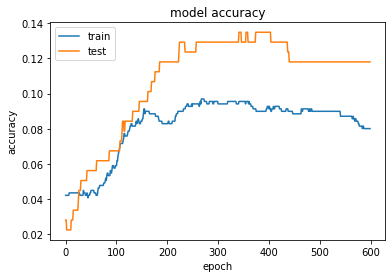

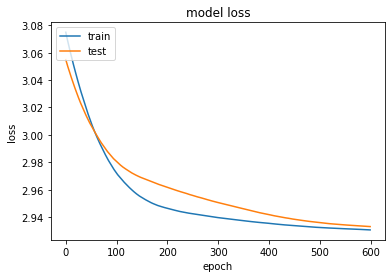

In [12]:
plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save('pokemon_so_deep/pokemon_multi_layer.h5')